In [2]:
%reset -f
#obspy libs
from obspy.core import read
from obspy.core import UTCDateTime
from obspy import read_inventory
from obspy import Stream, Trace
import obspy.signal
from obspy.core.util.obspy_types import ZeroSamplingRate
from obspy.io.xseed import Parser
from obspy.signal.invsim import paz_to_freq_resp

#numpy lib
import numpy as np

# matplotlib lib to plot things
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

from itertools import cycle # cycle over colors on plots

import sys
sys.path.append('../modules/')

from calibration import *
from MarsConverter import *

########################################
#
#      MAIN PART
#
########################################

#dataless485 = "/Users/greg/CODE/aspic/exportASPIC/resp_XB_ELYSE_1586427744.xml"
dataless539 = "/Users/greg/Dropbox (IPGP)/SEIS_ON_MARS/DailyREPORTING/SOL0539/resp_0539_XB_ELYSE_1599031139.xml"
inv_seed = read_inventory(dataless539)


########################################
# INFO about channel
chan_loc = "02"
chan_name = 'BHU'
station_name = "ELYSE"


########################################
#  MarsConverter part if needed
landerproperties = '../configuration/landerconfig.xml'
mDate = MarsConverter(landerproperties)
marsDateNow = mDate.get_utc_2_lmst()
posT = marsDateNow.find('T')
#print("Today, it is ", marsDateNow, "from ", 
#      str(mDate.get_lmst_to_utc(lmst_date=int(marsDateNow[:posT]))), 
#      " UTC to ", 
#      str(mDate.get_lmst_to_utc(lmst_date=(int(marsDateNow[:posT])+1))))

########################################
# Step to get UTC from LMST time
sol = 539

print("\n*********************")
print("Sol selected : ", sol, "from ", 
      str(mDate.get_lmst_to_utc(lmst_date=sol)), 
      " UTC to ", 
      str(mDate.get_lmst_to_utc(lmst_date=sol+1)))
print("\n*********************")
starttime_sol = str(mDate.get_lmst_to_utc(lmst_date=sol))
endtime_sol = str(mDate.get_lmst_to_utc(lmst_date=sol+1))



*********************
Sol selected :  539 from  2020-06-02T00:48:27.397205Z  UTC to  2020-06-03T01:28:02.641373Z

*********************


In [3]:
#print(inv_seed[0]._stations[0])
for sta in inv_seed[0]._stations:
    for cha in sta.channels:
        #print("channel: ", cha._code, " location: ", cha._location_code)
        if cha._code == chan_name and cha._location_code == chan_loc:
            for resp in cha.response.response_stages:
                print(resp)
                

Response type: PolesZerosResponseStage, Stage Sequence Number: 1
	XB.ELYSE.02BHU.2020.235.21.33.51 
	From M/S (VELOCITY in Meters Per Second) to V
	Stage gain: 257082.0, defined at 0.10 Hz
	Transfer function type: LAPLACE (RADIANS/SECOND)
	Normalization factor: 80.2887, Normalization frequency: 0.10 Hz
	Poles: (-46.7264+73.9273j), (-46.7264-73.9273j), (-11.7674+0j), (-0.243358+0.30515j), (-0.243358-0.30515j)
	Zeros: 0j, 0j, (-109.316+0j), (-10.1317+0j)
Response type: CoefficientsTypeResponseStage, Stage Sequence Number: 2
	From V to COUNTS
	Stage gain: 335544.0, defined at 0.00 Hz
	Decimation:
		Input Sample Rate: 500.00 Hz
		Decimation Factor: 1
		Decimation Offset: 0
		Decimation Delay: 0.00
		Decimation Correction: 0.00
	Transfer function type: DIGITAL
	Contains 0 numerators and 0 denominators
Response type: FIRResponseStage, Stage Sequence Number: 3
	XB.ELYSE.02.BHU.2020.235.21.33.51.stage_2 
	From COUNTS to COUNTS
	Stage gain: 1.0, defined at 0.00 Hz
	Decimation:
		Input Sample Ra

## Part to print the different stage of the selected channel

In [3]:
print_stage(inv_seed, station_name, chan_loc, chan_name, starttime = starttime_sol, endtime = endtime_sol)

Stages for 02  -  BHU
__________________________
Sensitivity object: 
Input units:  M/S
Output units:  COUNTS
	 stage sequence number:  1
	 +++++++++++++++++++++++++++++++++++++++++++++++++++++
Response type: PolesZerosResponseStage, Stage Sequence Number: 1
	XB.ELYSE.02BHU.2020.151.15.41.30 
	From M/S (VELOCITY in Meters Per Second) to V
	Stage gain: 257082.0, defined at 0.10 Hz
	Transfer function type: LAPLACE (RADIANS/SECOND)
	Normalization factor: 80.2887, Normalization frequency: 0.10 Hz
	Poles: (-46.7264+73.9273j), (-46.7264-73.9273j), (-11.7674+0j), (-0.243358+0.30515j), (-0.243358-0.30515j)
	Zeros: 0j, 0j, (-109.316+0j), (-10.1317+0j)
poles: [(-46.7264+73.9273j), (-46.7264-73.9273j), (-11.7674+0j), (-0.243358+0.30515j), (-0.243358-0.30515j)] 
 zeros: [0j, 0j, (-109.316+0j), (-10.1317+0j)]
	 stage sequence number:  2
	 +++++++++++++++++++++++++++++++++++++++++++++++++++++
Response type: CoefficientsTypeResponseStage, Stage Sequence Number: 2
	From V to COUNTS
	Stage gain: 335544

## Get the FIR numerators of the channel

In [4]:
# Stage Sequence Number
SSN = [2,3,4,5,6]
for S in SSN:
    FIR_Coeff = get_FIR_numerators(inv_seed, station_name, chan_name, chan_loc, S)
    print(S, FIR_Coeff)

2 []
3 []
4 []
5 []
6 []


## Plot FIR filter response

<IPython.core.display.Javascript object>


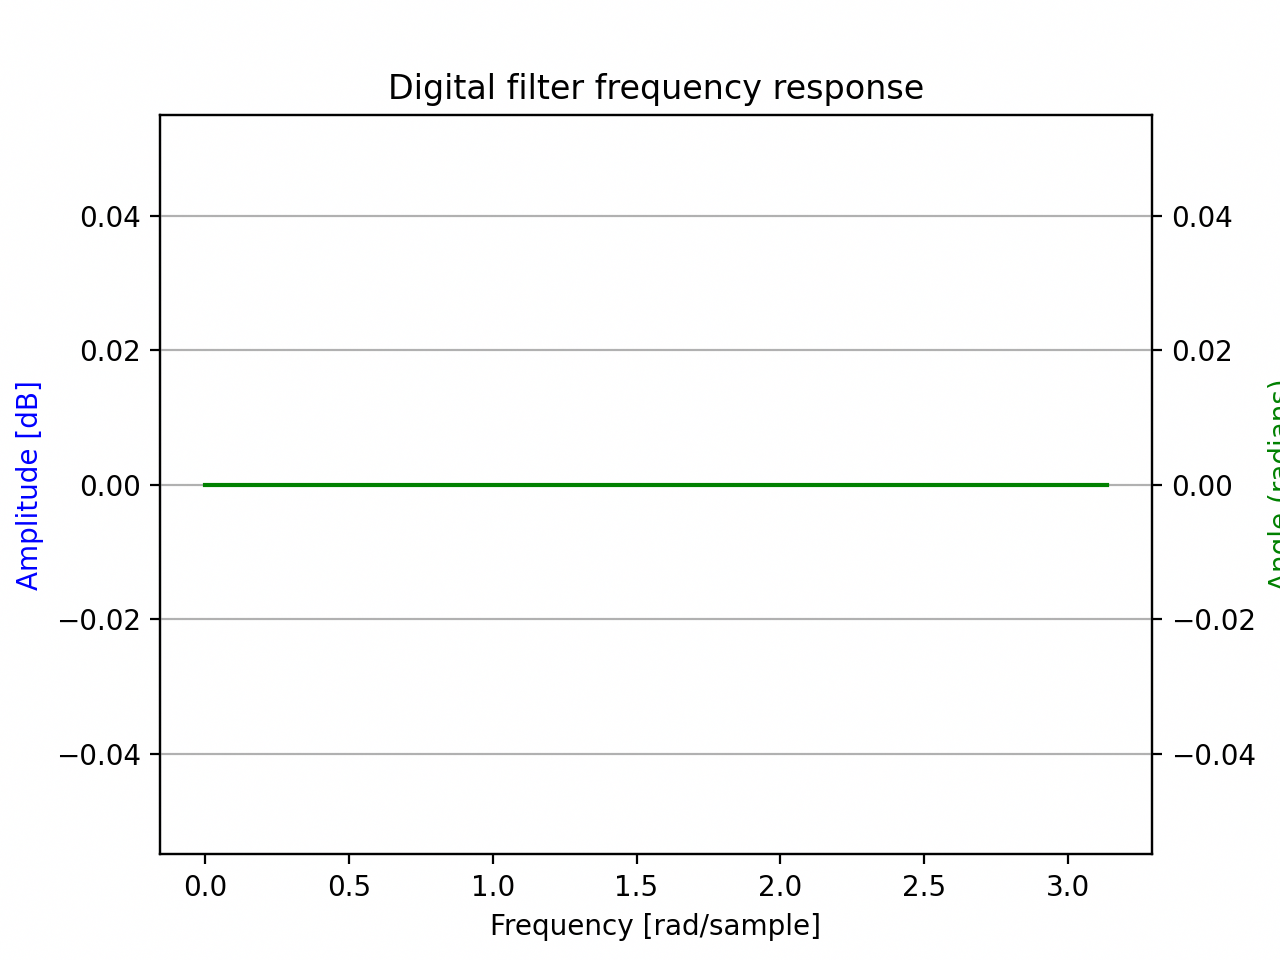

/Users/greg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/greg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


In [5]:
from scipy import signal

FIR_Coeff = get_FIR_numerators(inv_seed, station_name, chan_name, chan_loc, 2)

w, h = signal.freqz(FIR_Coeff)

import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)


plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')


ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

## Get the Pole and Zeros of the channel

In [7]:
paz = []
paz = get_paz(inv_seed, chan_name, chan_loc, station_name)
if paz is not None:
    print("poles:", paz[0])
    print("poles:", paz[1])

poles: [(-46.7264+73.9273j), (-46.7264-73.9273j), (-11.7674+0j), (-0.243358+0.30515j), (-0.243358-0.30515j)]
poles: [0j, 0j, (-109.316+0j), (-10.1317+0j)]


## Get Dip and Azimuth infos

In [93]:
get_dip_azimuth(inv_seed, station_name, chan_loc, chan_name)

{'dip': '0.0', 'azimuth': '90.0'}

## Plot the PAZ transfer function

<IPython.core.display.Javascript object>


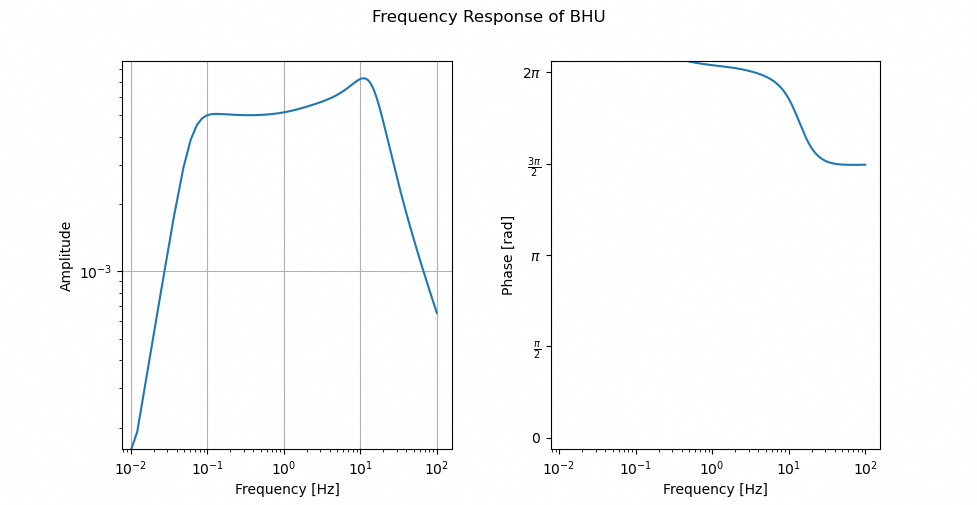

In [5]:
%matplotlib notebook
plot_paz(inv_seed, station_name, chan_loc, chan_name)


## Polynomial calibration

Coefficients:  [ 268.]


<IPython.core.display.Javascript object>


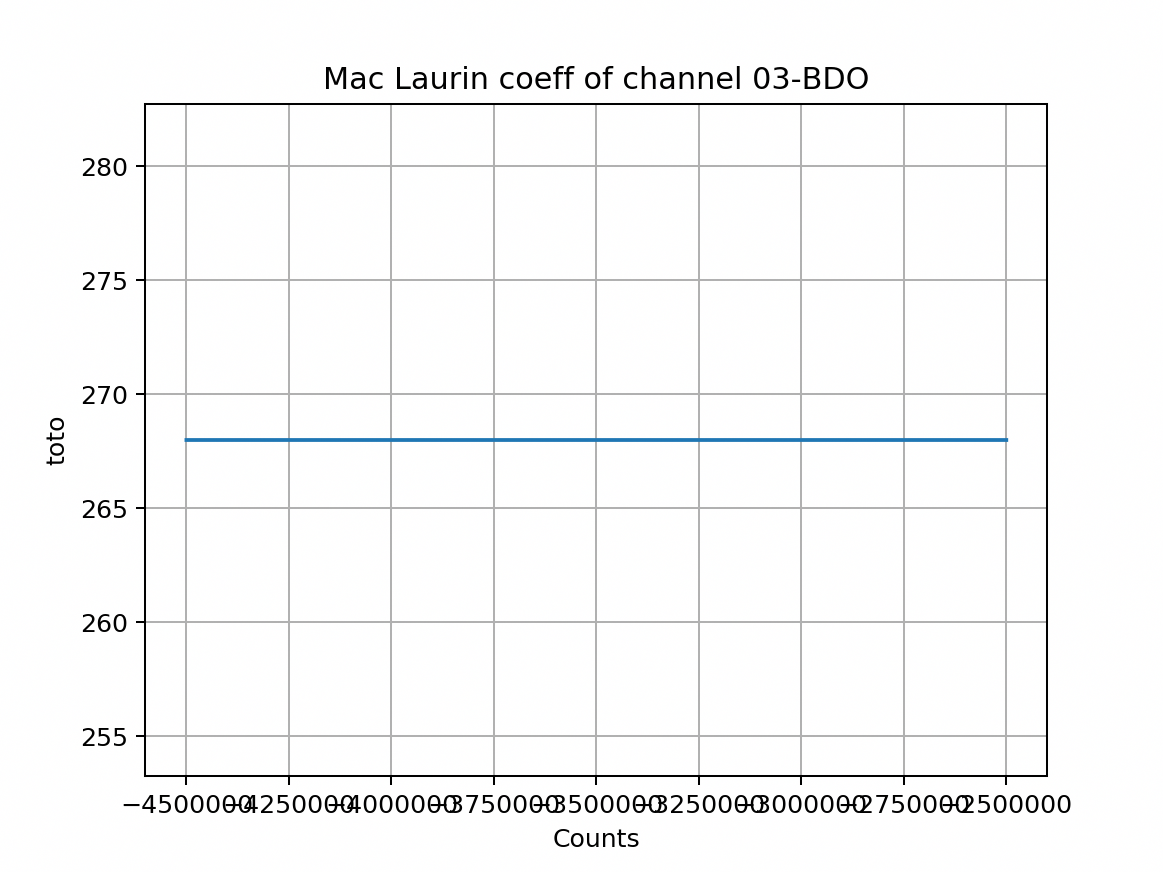

In [106]:

ytitle = "toto"
xtitle = "Counts"
title  = "Mac Laurin coeff of channel {}-{}".format(chan_loc, chan_name)

start = -4500000.
end   = -2500000.
step  = 10

coeffML = get_coeff_poly_resp_stage(inv_seed, station_name, chan_loc, chan_name, 
							  starttime=None, endtime=None)

coeffML = np.multiply(np.array([6.1504, 7.3621e-7]), 2.68e+4)
#coeffML = np.multiply(np.array([1.]), 2.68e+2)

if coeffML is not None and len(coeffML)>0: 
    print("Coefficients: ", coeffML)

# Plot of the polynomial function
if coeffML is not None and len(coeffML)>0: 
    plot_maclaurin(coeffML, start, end, step, xtitle, ytitle, title)
else:
    print("It seems, there is no Polynomial coef for {}-{}".format(chan_loc, chan_name))

## To plot the transfer function

In [16]:
#figs, axs = plot_responses(dataless455, channel_list, output, min_freq)
#plt.show()

# In Case you want to calibrate some data

2 Trace(s) in Stream:
XB.ELYSE.03.BDO | 2020-04-07T13:10:13.993000Z - 2020-04-08T13:50:43.393000Z | 10.0 Hz, 888295 samples
XB.ELYSE.13.BDO | 2020-04-07T13:10:41.513000Z - 2020-04-08T13:50:23.713000Z | 10.0 Hz, 887823 samples
1 Trace(s) in Stream:
XB.ELYSE.03.BDO | 2020-04-07T13:10:13.993000Z - 2020-04-08T13:50:43.393000Z | 10.0 Hz, 888295 samples
1.0  -  []  -  [480.135, 39.0163, 0.07776, 0.014183]
physical_units:  {'type': 'Poly', 'xunit': 'V', 'yunit': 'PA', 'yunit_desc': 'PRESSURE in Pascal'}
Gain Counts to Volts: 1.0 
03-BDO: [480.135, 39.0163, 0.07776, 0.014183]
03-BDO is converted in PRESSURE in Pascal.


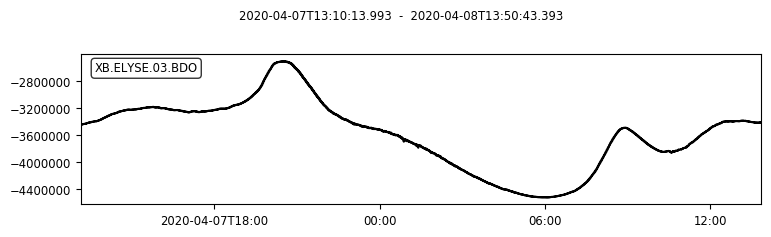

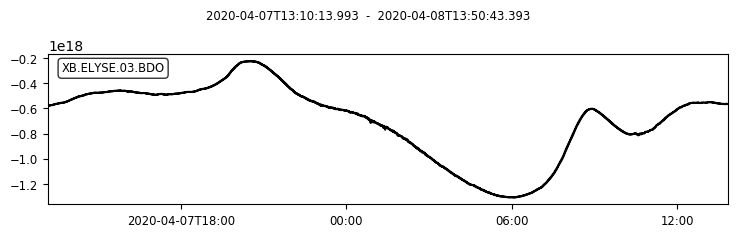

In [133]:
def removeResponseFunction(channel, inv, output, waterlevel = None, prefilt = None, zero_mean_val = False):
    """
    Function to calibrate the signal in physical units. 
    It's based on ObsPy commands : 'remove_response' for the conversion in 
    acc, vel, disp but it's internal for other conversion (Celcius, Ampère...)
    ----
    INPUT:
        @channel : input channel on which is applied the calibration
        @inv : dataless read by ObsPy ('read' command)
        @waterlevel : 
        @prefilt    :
        @zero_mean_val: 
    OUTPUT:
        @result : channel corrected from the transfer function 
    
    """          
   
    if output in ['DISP','ACC','VEL']:
        try:
            cptrace = channel.copy()
            #=========================================================
            #  WARNING: patch added to be able to calibrate 
            #  NEZ channels using UVW transfer functions
            #  @date 19/08/29     @author:sainton@ipgp.fr 
            #
            newchannelcode = patch2CalibRotated(cptrace.stats.channel)
            if newchannelcode != cptrace.stats.channel:
                cptrace.stats.channel = newchannelcode

            if prefilt is not None:
                if waterlevel is not None:
                    result = cptrace.remove_response(inventory=inv, output=output, 
                                                         plot=False, zero_mean=zero_mean_val,
                                                         water_level = waterlevel, 
                                                         pre_filt = prefilt)  
                else:
                    result = cptrace.remove_response(inventory=inv, output=output, 
                                                         plot=False, zero_mean=zero_mean_val, 
                                                         pre_filt=prefilt)
            else:
                # No passband filter provided
                if waterlevel is not None:
                    result = cptrace.remove_response(inventory=inv, output=output, 
                                                         plot=False, zero_mean=zero_mean_val, 
                                                         water_level=waterlevel)   
                else:
                    result = cptrace.remove_response(inventory=inv, output=output, 
                                                         plot=False, zero_mean=zero_mean_val)

            # Units change in metadata
            return result
        except NotImplementedError:
            print("Impossible to calibrate in this unit")
            return None
        
        
    
    elif output == 'Volts':
        # To calibrate our data in Volts 
        # -------------------------------
        #  This part contains to corrections :
        #   1> Correction from FIR gains.
        #   2> Conversion from counts to Volts

        # 09/01/2020 : Correction added to fix the factor 4 issue 
        # (using the dataless, POS data are 4 times to high)


        # get count to volts gain
        gain_c2v = get_counts_2_Volts(inv, channel.stats.station, \
                        channel.stats.location, channel.stats.channel)

        # get list of coefficients 
        FIR_coeff = get_FIR_gains(inv, channel.stats.station, \
                        channel.stats.location, channel.stats.channel)

        # get coefficients from the polynomial coef C_i to estimate the function Unit = f(V)
        poly_coef = get_coeff_poly_resp_stage(inv, channel.stats.station, \
                        channel.stats.location, channel.stats.channel)

        # Don't touch to the original data...
        cptrace = channel.copy()

        #FIR correction
        if FIR_coeff is not None:
            if len(FIR_coeff)!=0:
                for coef in FIR_coeff:
                    cptrace.data = np.divide(cptrace.data, coef)
               
                print("FIR coefficients correction: {}".format(FIR_coeff))   
                result = cptrace.copy()
        else:
            
            print("ERROR: FIR coefficients correction for {}: Impossible, error in coefs.")
            result = cptrace.copy()
            result = None

        #Count to gain conversion
        if gain_c2v is not None:
            if gain_c2v !=0: 
                cptrace.data = np.divide(cptrace.data, gain_c2v)
                print("Gain Counts to Volts: {} ".format(gain_c2v))
                result = cptrace.copy()
        else:
            print("ERROR: Counts to Volts conversion for {}-{}: \
                        Impossible, error in gain.".format(channel.stats.location, channel.stats.channel))
            result = cptrace.copy()
            result = None

        return result  #After calibration in Volts
    else:
        # Calibration in every other physical units

        # get count to volts gain
        gain_c2v = get_counts_2_Volts(inv, channel.stats.station, \
                        channel.stats.location, channel.stats.channel)

        # get list of coefficients 
        FIR_coeff = get_FIR_gains(inv, channel.stats.station, \
                        channel.stats.location, channel.stats.channel)

        # get coefficients from the polynomial coef C_i to estimate the function Unit = f(V)
        poly_coef = get_coeff_poly_resp_stage(inv, channel.stats.station, \
                        channel.stats.location, channel.stats.channel)

        # get physical units from the dataless
        physical_units = get_units(inv, channel.stats.station, \
                        channel.stats.location, channel.stats.channel)

        print(gain_c2v," - " ,FIR_coeff," - " ,poly_coef)
        print("physical_units: ", physical_units)
        cptrace = channel.copy()


        if poly_coef is not None and poly_coef != []:
            #FIR correction
            if FIR_coeff is not None:
                if len(FIR_coeff)!=0:
                    for coef in FIR_coeff:
                        cptrace.data = np.divide(cptrace.data, coef)

                    print("FIR coefficients correction: {}".format(FIR_coeff))   
                    result = cptrace.copy()
            else:

                print("ERROR: FIR coefficients correction for {}: Impossible, error in coefs.")
                result = cptrace.copy()
                result = None

            #Count to gain conversion
            if gain_c2v is not None:
                if gain_c2v !=0: 
                    cptrace.data = np.divide(cptrace.data, gain_c2v)
                    print("Gain Counts to Volts: {} ".format(gain_c2v))
                    result = cptrace.copy()
            else:
                print("ERROR: Counts to Volts conversion for {}-{}: \
                            Impossible, error in gain.".format(channel.stats.location, channel.stats.channel ))
                result = cptrace.copy()
                result = None

                
            #Volts to physical units conversion
            if len(poly_coef)!=0 and (poly_coef) is not None:
                if len(poly_coef) == 1 and poly_coef[0] == 1.0:
                    print("{}-{} is already in physical units. Update of \
                                    the y axis title.".format(channel.stats.location, channel.stats.channel))
                else:
                    print("{}-{}: {}".format(channel.stats.location, channel.stats.channel, poly_coef))
                    for i in range (0, len(cptrace.data)):
                        cptrace.data[i]=funct_ML(poly_coef, cptrace.data[i])

                    print("{}-{} is converted in {}.".format(channel.stats.location, channel.stats.channel, physical_units.get("yunit_desc")))
                
                result = cptrace.copy()
        else:
            print("Wrong choice of units with {}-{}".format(channel.stats.location, channel.stats.channel))

    return result 


#####################################################
# CALIBRATION SAND BOX
#     (VERY DEGRADED VERSION OF ASPIC)
#     (JUST IMPLEMENTED TO TEST DATALESS) 
#####################################################

#######################################
# MSEED file if needed

mseed = "/Users/greg/CODE/aspic/exportASPIC/msds.fdsnws.1586427744.mseed"
mseed_data = read(mseed)
print(mseed_data)

#######################################
# CHANNEL selection

channel = mseed_data.select(station = station_name, 
                          location = chan_loc,
                          channel = chan_name)
print(channel)

%matplotlib inline
#pre_filt = [0.0001,0.0009,9.,10.]
#waterlevel = 145
#zero_mean_val=False 

output_units = "Pa"
if channel is not None and len(channel)==1:    
    result = removeResponseFunction(channel[0], inv_seed, output_units) 
    if result is not None:
        channel[0].plot()
        result.plot()
    else:
        print("No plot.")
else:
    print("Either channel list is empty, either there is more than one channel.")

## Old part connected with ASPIC

In [ ]:
#####
#
# Test made to check the quality of the calibration.
#

%matplotlib notebook

tabnum = 1
chan = 0
print(list_of_active_tab[tabnum]["channels"][chan].stats)

starttime = list_of_active_tab[tabnum]["channels"][chan].stats.starttime
npts = list_of_active_tab[tabnum]["channels"][chan].stats.npts
sp = list_of_active_tab[tabnum]["channels"][chan].stats.sampling_rate

t = np.arange(starttime, starttime + npts/sp, 1/sp)
data = list_of_active_tab[tabnum]["channels"][chan].data
#data2 = np.multiply(data, 6094./7043.83)
from obspy.signal.util import _npts2nfft
nfft = _npts2nfft(npts)

#data2 = np.fft.rfft(data, n=nfft)
#data3 = np.fft.irfft(data2)[0:npts]

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(t,data)
ax.plot(t, data,'r--')
#ax.plot(t, data3,'b')
ax.grid(True)


from obspy.signal.invsim import (cosine_taper, cosine_sac_taper, invert_spectrum)

dataless = "./Dropbox (IPGP)/SEIS_Greg/ASPIC_life/Reporting/dataless/dataless.XB.ELYSE.seed"
inv = read_inventory(dataless)

station_name = "ELYSE"
loc = "10"
chan_name = "LMV"

try:
    response_chan_sta = inv.select(channel=chan_name, station=station_name, location=loc)[0][0][0]
    print(response_chan_sta)
except:
    print("No response found with {}/{}/{}".format(station_name, loc, chan_name))
else:
    resp = response_chan_sta.response
    stages = resp.response_stages
    for stage in stages:
        if isinstance(stage, obspy.core.inventory.response.PolynomialResponseStage):
            print(stage._coefficients)    
        if isinstance(stage, obspy.core.inventory.response.PolesZerosResponseStage):
            poles = resp.get_paz()._poles
            zeros = resp.get_paz()._zeros
            print("poles", poles)
            print("zeros", zeros)

    gain = resp.response_stages[0].stage_gain
    print("gain", gain)
    print(resp.response_stages[0])
    
    print(data)
    data = data.astype(np.float64)
    npts = len(data)
    data *= cosine_taper(npts, 0.05, sactaper=True, halfcosine=False)
    nfft = _npts2nfft(npts)
    data = np.fft.rfft(data, n=nfft)
    water_level = 60
    freq_response, freqs = resp.get_evalresp_response(1/sp, nfft, output = "ACC")
    invert_spectrum(freq_response, water_level)
    
    data *= freq_response
    data[-1] = abs(data[-1]) + 0.0j
    
    data = np.fft.irfft(data)[0:npts]
    
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ax.plot(t,data)
    ax.plot(t, data,'g')
    #ax.plot(t, data3,'b')
    ax.grid(True)